In [1]:
#data processing 
import pandas as pd 
import seaborn as sns
#special visulaization
import missingno as msno
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import requests
import imageio
from io import BytesIO
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import os
os.environ["PROJ_LIB"] = r"C:\Users\16303\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share"
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
fields=[ 'class_of_admission','country_of_citizenship','employer_state','job_info_work_city','job_info_work_state','pw_soc_title','us_economic_sector','case_received_date','employer_city']
data=pd.read_csv('us_perm_visas.csv',usecols=fields)
location=pd.read_csv('lat.csv')
#df= data[['class_of_admission','country_of_citizenship','employer_state','job_info_work_city','pw_soc_title','us_economic_sector','case_received_date']].copy()

In [3]:
data.head()

,case_received_date,class_of_admission,country_of_citizenship,employer_city,employer_state,job_info_work_city,job_info_work_state,pw_soc_title,us_economic_sector
0,NaN,J-1,ARMENIA,NEW YORK,NY,New York,NY,"Computer Software Engineers, Applications",IT
1,NaN,B-2,POLAND,CARLSTADT,NY,New York,NY,Hazardous Materials Removal Workers,Other Economic Sector
2,NaN,H-1B,INDIA,GLEN ALLEN,VA,Lutherville,MD,Civil Engineers,Aerospace
3,NaN,B-2,SOUTH KOREA,FLUSHING,NY,Flushing,NY,File Clerks,Other Economic Sector
4,NaN,L-1,CANADA,ALBANY,NY,Albany,NY,Sales Engineers,Advanced Mfg


In [4]:
data.shape

(374362, 9)

In [5]:
data.isnull().sum()

case_received_date        135271
class_of_admission         22845
country_of_citizenship        59
employer_city                 14
employer_state                42
job_info_work_city           102
job_info_work_state          103
pw_soc_title                2336
us_economic_sector        245294
dtype: int64

In [6]:
data.describe()

,case_received_date,class_of_admission,country_of_citizenship,employer_city,employer_state,job_info_work_city,job_info_work_state,pw_soc_title,us_economic_sector
count,239091,351517,374303,374348,374320,374260,374259,372026,129068
unique,2180,57,202,8384,113,9429,113,905,17
top,6/30/2014,H-1B,INDIA,NEW YORK,CALIFORNIA,New York,CALIFORNIA,"Software Developers, Applications",IT
freq,767,283018,205158,16730,51127,16971,47699,114841,52617


In [7]:
data.columns

Index(['case_received_date', 'class_of_admission', 'country_of_citizenship',
       'employer_city', 'employer_state', 'job_info_work_city',
       'job_info_work_state', 'pw_soc_title', 'us_economic_sector'],
      dtype='object')

## Groupping data based on country of citzenship

In [8]:
#df=data.groupby('country_of_citizenship')['employer_city'].count()
#df=data.groupby('country_of_citizenship')
data.columns = ['case_received_date', 'class_of_admission', 'birth_country',
       'city', 'state_name', 'work_city',
       'work_state', 'pw_soc_title', 'us_economic_sector']
df=data.groupby('birth_country')

In [9]:
df.first()

,case_received_date,class_of_admission,city,state_name,work_city,work_state,pw_soc_title,us_economic_sector
birth_country,,,,,,,,
AFGHANISTAN,12/3/2013,Not in USA,ONTARIO,CA,Ontario,CA,Executive Secretaries and Administrative Assis...,Automotive
ALBANIA,8/15/2012,B-2,NEW YORK,NY,NEW YORK,NY,Financial Analysts,Finance
ALGERIA,5/9/2014,L-1,HOUSTON,TEXAS,Houston,TEXAS,"Geoscientists, Except Hydrologists and Geograp...",Geospatial
ANDORRA,5/1/2015,H-1B,New York,NY,New York,NY,Computer Systems Analysts,NaN
ANGOLA,4/8/2013,H-1B,MEDLEY,FL,Medley,FL,"Electronics Engineers, Except Computer",Other Economic Sector
ANTIGUA AND BARBUDA,8/6/2014,H-1B,WARREN,MICHIGAN,St. Clair Shores,MICHIGAN,Family and General Practitioners,Health Care
ARGENTINA,10/6/2014,H-1B,NORTH JUPITER,FL,NORTH JUPITER,FL,General and Operations Managers,Other Economic Sector
ARMENIA,7/9/2013,J-1,NEW YORK,NY,New York,NY,"Computer Software Engineers, Applications",IT
ARUBA,NaN,NaN,WASHINGTON,DISTRICT OF COLUMBIA,Washington,DISTRICT OF COLUMBIA,NaN,NaN


EDA lat long

In [10]:
location.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [22]:
location1=location[['city','state_id','lat','lng']].copy()

In [23]:
location1.head()

,city,state_id,lat,lng
0,South Creek,WA,46.9994,-122.3921
1,Roslyn,WA,47.2507,-121.0989
2,Sprague,WA,47.3048,-117.9713
3,Gig Harbor,WA,47.3352,-122.5968
4,Lake Cassidy,WA,48.0639,-122.0920


In [31]:
#merged_inner = pd.merge(left=data,right=location1, left_on='city', right_on='city',left_on='state_name',right_on='state_id')
final_dataset = pd.merge(data, location1,  how='inner', left_on=['city','state_name'], right_on = ['city','state_id'])

In [32]:
final_dataset.head()
# test=data.groupby('birth_country')
# test.head()

,case_received_date,class_of_admission,birth_country,city,state_name,work_city,work_state,pw_soc_title,us_economic_sector,state_id,lat,lng
0,5/5/2015,E-2,IRELAND,Omaha,NE,Omaha,NE,Chief Executives,NaN,NE,41.2628,-96.0498
1,3/20/2015,F-1,INDIA,Omaha,NE,Omaha,NE,Biomedical Engineers,NaN,NE,41.2628,-96.0498
2,4/2/2015,H-1B,PAKISTAN,Omaha,NE,Omaha,NE,Database Administrators,NaN,NE,41.2628,-96.0498
3,5/26/2015,H-1B,NEPAL,Omaha,NE,Omaha,NE,Computer Systems Analysts,NaN,NE,41.2628,-96.0498
4,6/17/2015,H-1B,VIETNAM,Omaha,NE,Omaha,NE,Electrical Engineers,NaN,NE,41.2628,-96.0498


In [30]:
final_dataset.where(final_dataset['birth_country']=='INDIA',inplace=True)
final_dataset

,case_received_date,class_of_admission,birth_country,city,state_name,work_city,work_state,pw_soc_title,us_economic_sector,state_id,lat,lng
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/20/2015,F-1,INDIA,Omaha,NE,Omaha,NE,Biomedical Engineers,NaN,NE,41.2628,-96.0498
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6/24/2015,Not in USA,INDIA,Omaha,NE,Solomons,MD,Civil Engineers,NaN,NE,41.2628,-96.0498
6,7/9/2015,H-1B,INDIA,Omaha,NE,Omaha,NE,"Software Developers, Applications",NaN,NE,41.2628,-96.0498
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,12/1/2015,H-1B,INDIA,Omaha,NE,Omaha,NE,"Software Developers, Applications",NaN,NE,41.2628,-96.0498


In [28]:
final_dataset.isnull().sum()

case_received_date        0
class_of_admission     2183
birth_country             0
city                      0
state_name                0
work_city                 0
work_state                0
pw_soc_title              1
us_economic_sector    16996
state_id                  0
lat                       0
lng                       0
dtype: int64

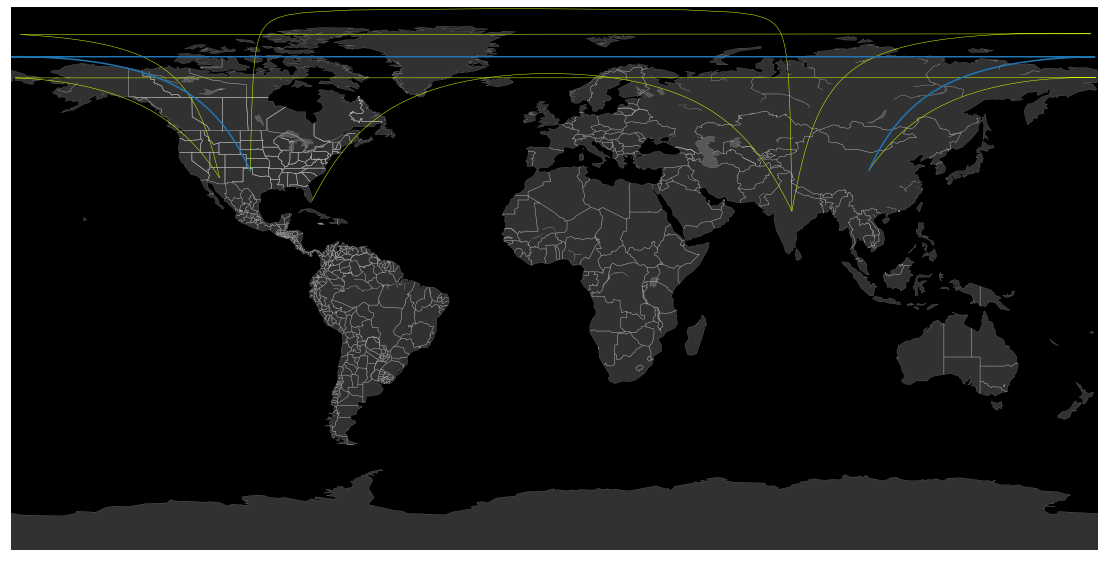

In [18]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(50, 10), edgecolor='w')
m=Basemap(projection='cyl',llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
m.drawmapboundary(fill_color='#000000', linewidth=0)
m.fillcontinents(color='#FAF9FC', alpha=0.2, lake_color='#F2F1F5')
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcountries(color='0.7')
m.drawstates(color='0.7')

 
# Add a connection between new york and London
startlat = 25.7839; startlon = -80.2102
arrlat = 22.3511148; arrlon = 78.6677428
arrlat1 = 35.8617; arrlon1 = 104.1954
startlat1 = 35.6924; startlon1 = -100.6416
startlat2 = 33.3951; startlon2 = -110.8722
startlat3 = 33.3951; startlon3 = -110.8722
m.drawgreatcircle(startlon3,startlat3,arrlon1,arrlat1, linewidth=0.5, color='#CCFF00')
m.drawgreatcircle(startlon2,startlat2,arrlon,arrlat, linewidth=0.5, color='#CCFF00')
m.drawgreatcircle(startlon1,startlat1,arrlon,arrlat, linewidth=0.5, color='#CCFF00')
m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=0.5, color='#CCFF00')
x, y = m.gcpoints(startlon,startlat,arrlon,arrlat, 300)
mpatches.Arc([x,y],5, 5, angle=0, theta1=45, theta2=135)
x, y = m.gcpoints(startlon1,startlat1,arrlon1,arrlat1, 300)
m.plot(x, y)
plt.show()
